In [1]:
%cd /content/drive/My Drive/Colab Notebooks/regaetton_songs_nlp

/content/drive/My Drive/Colab Notebooks/regaetton_songs_nlp


In [2]:
eval_path = '/content/drive/MyDrive/Colab Notebooks/regaetton_songs_nlp/data/normalized_eval_lyrics.csv'
train_path = '/content/drive/MyDrive/Colab Notebooks/regaetton_songs_nlp/data/normalized_train_lyrics.csv'

In [22]:
import pandas as pd
import matplotlib.pyplot as plt 

from wordcloud import WordCloud

In [10]:
train_data = pd.read_csv(train_path)
eval_data = pd.read_csv(eval_path)

join_data = pd.concat([train_data, eval_data], axis=0)
len(join_data)

8665

# Join the lyrics into one corpus

We will want 2 different corpus:

- lyrics with sexual content 
- lyrics without sexual content


In [5]:
def join_lyrics(list_lyrics):
    result= ''
    for element in list_lyrics:
        result += str(element)
    return result

In [11]:
no_sexual_content = join_data[join_data.sexual_content == 0]
sexual_content = join_data[join_data.sexual_content == 1]


print(f'Lyrics without sexual content: {len(no_sexual_content)}')
print(f'Lyrics with sexual content: {len(sexual_content)}')

Lyrics without sexual content: 5598
Lyrics with sexual content: 3067


In [13]:
corpus_no_sexual_content = join_lyrics(list(no_sexual_content.lyrics.values))
corpus_sexual_content = join_lyrics(list(sexual_content.lyrics.values))

print(len(corpus_no_sexual_content))
print(len(corpus_sexual_content))

4079690
2910580


# Calculate frequency for each word

In [15]:
def calculate_frequency(text):
    words = text.split()
    word_count = dict()
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1

    return word_count


In [16]:
no_sexual_count = calculate_frequency(corpus_no_sexual_content)
sexual_count = calculate_frequency(corpus_sexual_content)

In [31]:
def create_wordcloud(frequency, filename):
    wordcloud = WordCloud(width = 1200, height = 1200, min_font_size =10).generate_from_frequencies(frequency)

    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.tight_layout()
    plt.savefig(filename) 

    plt.show()

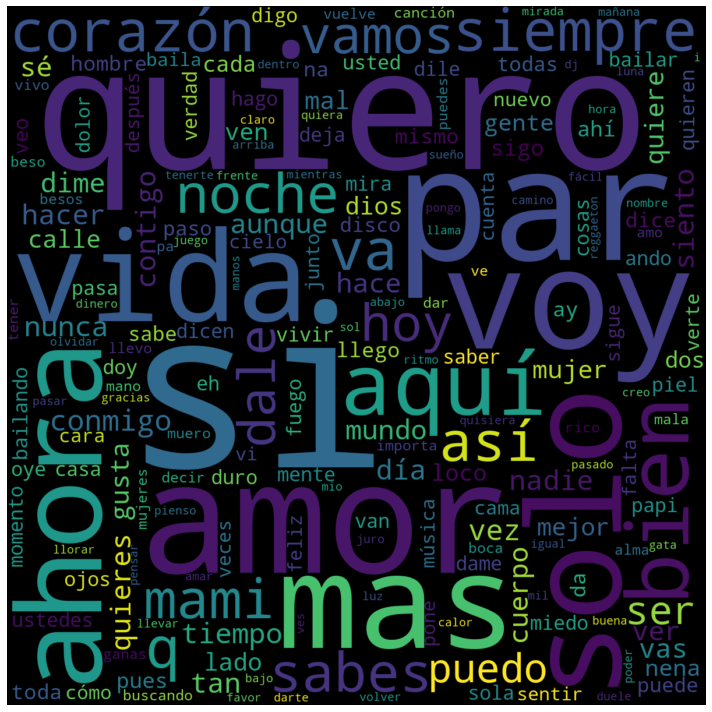

In [32]:
create_wordcloud(no_sexual_count, 'no_sexual_content_wordcloud.png')

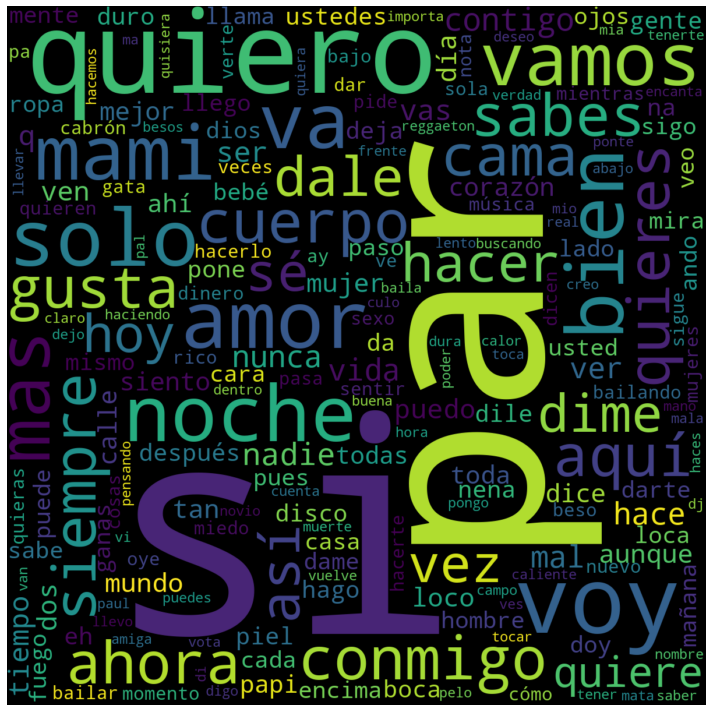

In [33]:
create_wordcloud(sexual_count, 'sexual_content_wordcloud.png')